# DESCRIPTIVE ANALYSIS

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA CLEANING SUMMARY

In order to understand the information, I'm going to list the main points of the data cleaning: 
1. Accidents are included in **three different documents**, one per year, so the main task in the biggining of the cleaning process is to compare and make all features (columns) the same for all documents 
2. **Nans and Nulls** existance 
3. **Homogenize** the categories of the features 
4. Merge the three datasets
5. Create **new features**:
    - Weekday (week_day)
    - Month (month)
    - Number of claims per number (num_claims) *
    - Hour
    - Working day or weekend y/o bank holiday

7. Process UTM coordinates

At this point we are going to create two different datasets:
- **'accidents.csv'**
    - List with unique claim number and the features that describe the accident, excluding the information of the people involved 
    - By this segmentation we will be able to focus on the **probability of occurrence** and the distribution along the year
- **'accidents_total.csv'**
    - Dataset with the complete information, in order to focus on the **people involved** in the accidents

*As mention in 'Cleaning Jupyter notebook' there is one line per claim, so we create a feature with the number of claim per number*

## NUMBER OF ACCIDENTS

In [101]:
path_acc = '/home/dsc/Master DS/TFM/GIT/accidents.csv'

In [102]:
accidents = pd.read_csv(path_acc, sep = '^' )

In [103]:
accidents.columns.tolist()

['Unnamed: 0',
 'num_expediente',
 'fecha',
 'hora',
 'cod_distrito',
 'tipo_accidente',
 'estado_meteorologico',
 'coordenada_x_utm',
 'coordenada_y_utm',
 'year_date',
 'weak_day',
 'month',
 'hour',
 'is_weekend_bank']

## 1. When?

Refering to time we have the following features:
- 'fecha': 'year_date', 'month', 'weak_day', 'is_weekend_bank'
- 'hora' and 'hour'

### Evolution per year
There is a decrease of traffic accidents in the years of study.

In [104]:
x_values = accidents['year_date'].unique()
y_values = accidents['year_date'].value_counts().tolist()

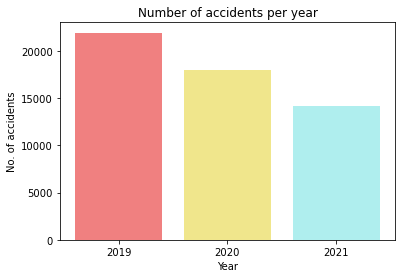

In [105]:
plt.bar(x_values, 
        y_values,
        color=['lightcoral', 'khaki',  'paleturquoise'])

plt.title('Number of accidents per year')
plt.xlabel('Year')
plt.ylabel('No. of accidents')
plt.xticks(x_values)
plt.show()
plt.close('all')

### Evolution along the year
The evolution of the number of accidents per month has **the same distribution** for the years of analysis, taking into account the following highlights:
- there is a drop for all years in August, because of summer holidays
- the impact of the 2020 lockdown, which brought the number to the minimum
- since the pandemic started, we haven't reached previous year numbers
- 2021 figures are growing little by little into figures before pandemic

In [73]:
acc_2019 = accidents[accidents['year_date']==2019]
acc_2019 = acc_2019.groupby('month')['num_expediente'].count().reset_index()
df19 = acc_2019.drop('month',axis=1) 
df19 = df19.rename(columns={'num_expediente':'2019'})

acc_2020 = accidents[accidents['year_date']==2020]
acc_2020 = acc_2020.groupby('month')['num_expediente'].count().reset_index()
df20 = acc_2020.drop('month',axis=1) 
df20 = df20.rename(columns={'num_expediente':'2020'})

acc_2021 = accidents[accidents['year_date']==2021]
acc_2021 = acc_2021.groupby('month')['num_expediente'].count().reset_index()    
df21 = acc_2021.drop('month',axis=1) 
df21 = df21.rename(columns={'num_expediente':'2021'})

months = ['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
acc_year_month = pd.concat([df19, df20,df21],axis=1) 
acc_year_month['month' ]= months 
acc_year_month.set_index('month',inplace = True)

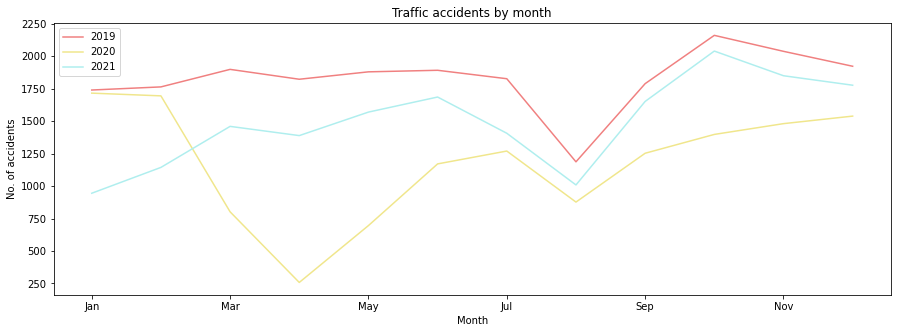

In [74]:
acc_year_month.plot(kind='line',
                    color=['lightcoral', 'khaki',  'paleturquoise'],
                    stacked=False,
                    figsize=(15, 5))

plt.title('Traffic accidents by month')
plt.ylabel('No. of accidents')
plt.xlabel('Month')
plt.show()

### Weakday
The day of the week with more accidents is Friday.

We can also can see that the distribution per weekday is the same for all years and also being Friday the day with more accidents for all years of the dataset.

In [9]:
acc_weak_day = accidents.groupby('weak_day')['num_expediente'].count().reset_index()
acc_weak_day['code_weak_days'] = list('5167423')
acc_weak_day = acc_weak_day.sort_values('code_weak_days',ascending=True)
acc_weak_day.set_index('weak_day',inplace = True)
acc_weak_day = acc_weak_day.drop(labels='code_weak_days', axis=1)

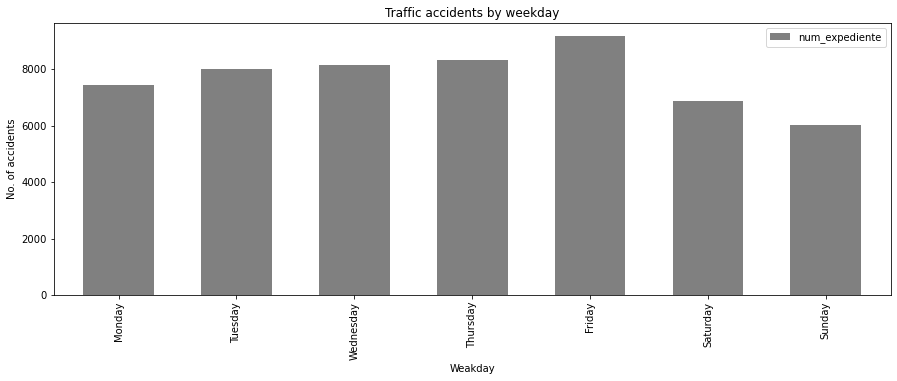

In [10]:
acc_weak_day.plot(kind='bar',
                    color=['grey'],
                    width = 0.6,
                    stacked=False,
                    figsize=(15, 5))

plt.title('Traffic accidents by weekday')
plt.ylabel('No. of accidents')
plt.xlabel('Weekday')
plt.show()

In [11]:
acc_2019 = accidents[accidents['year_date']==2019]
acc_2019 = acc_2019.groupby('weak_day')['num_expediente'].count().reset_index()
acc_2019['code_weak_days'] = list('5167423')
acc_2019 = acc_2019.sort_values('code_weak_days',ascending=True)
acc_2019.set_index('weak_day',inplace = True)
acc_2019 = acc_2019.drop(labels='code_weak_days', axis=1)
acc_2019 = acc_2019.rename(columns={'num_expediente':'2019'})

acc_2020 = accidents[accidents['year_date']==2020]
acc_2020 = acc_2020.groupby('weak_day')['num_expediente'].count().reset_index()
acc_2020['code_weak_days'] = list('5167423')
acc_2020 = acc_2020.sort_values('code_weak_days',ascending=True)
acc_2020.set_index('weak_day',inplace = True)
acc_2020 = acc_2020.drop(labels='code_weak_days', axis=1)
acc_2020 = acc_2020.rename(columns={'num_expediente':'2020'})

acc_2021 = accidents[accidents['year_date']==2021]
acc_2021 = acc_2021.groupby('weak_day')['num_expediente'].count().reset_index()
acc_2021['code_weak_days'] = list('5167423')
acc_2021 = acc_2021.sort_values('code_weak_days',ascending=True)
acc_2021.set_index('weak_day',inplace = True)
acc_2021 = acc_2021.drop(labels='code_weak_days', axis=1)
acc_2021 = acc_2021.rename(columns={'num_expediente':'2021'})

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
acc_year_week = pd.concat([acc_2019, acc_2020,acc_2021],axis=1) 
acc_year_week['weekday' ]= weekday 
acc_year_week.set_index('weekday',inplace = True)

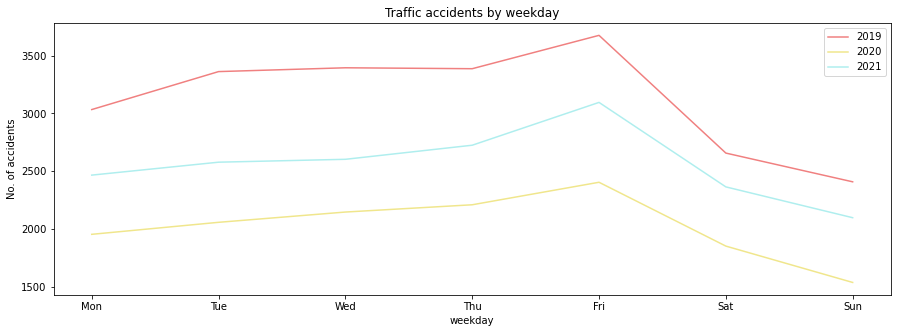

In [12]:
acc_year_week.plot(kind='line',
                    color=['lightcoral', 'khaki',  'paleturquoise'],
                    stacked=False,
                    figsize=(15, 5))

plt.title('Traffic accidents by weekday')
plt.ylabel('No. of accidents')
plt.xlabel('weekday')
plt.show()

In [84]:
acc_mon = accidents[accidents['weak_day'] == 'Monday']
acc_mon = acc_mon.groupby('month')['weak_day'].count().reset_index()
acc_mon.set_index('month',inplace = True)
acc_mon = acc_mon.rename({'weak_day': 'Monday'}, axis=1)

acc_tue = accidents[accidents['weak_day'] == 'Tuesday']
acc_tue = acc_tue.groupby('month')['weak_day'].count().reset_index()
acc_tue.set_index('month',inplace = True)
acc_tue = acc_tue.rename({'weak_day': 'Tuesday'}, axis=1)

acc_wed = accidents[accidents['weak_day'] == 'Wednesday']
acc_wed = acc_wed.groupby('month')['weak_day'].count().reset_index()
acc_wed.set_index('month',inplace = True)
acc_wed = acc_wed.rename({'weak_day': 'Wednesday'}, axis=1)

acc_thu = accidents[accidents['weak_day'] == 'Thursday']
acc_thu = acc_thu.groupby('month')['weak_day'].count().reset_index()
acc_thu.set_index('month',inplace = True)
acc_thu = acc_thu.rename({'weak_day': 'Thursday'}, axis=1)

acc_fri = accidents[accidents['weak_day'] == 'Friday']
acc_fri = acc_fri.groupby('month')['weak_day'].count().reset_index()
acc_fri.set_index('month',inplace = True)
acc_fri = acc_fri.rename({'weak_day': 'Friday'}, axis=1)

acc_sat = accidents[accidents['weak_day'] == 'Saturday']
acc_sat = acc_sat.groupby('month')['weak_day'].count().reset_index()
acc_sat.set_index('month',inplace = True)
acc_sat = acc_sat.rename({'weak_day': 'Saturday'}, axis=1)

acc_sun = accidents[accidents['weak_day'] == 'Sunday']
acc_sun = acc_sun.groupby('month')['weak_day'].count().reset_index()
acc_sun.set_index('month',inplace = True)
acc_sun = acc_sun.rename({'weak_day': 'Sunday'}, axis=1)

acc_year_month = pd.concat([acc_mon, acc_tue,acc_wed, acc_thu, acc_fri, acc_sat, acc_sun],axis=1) 
acc_year_month;

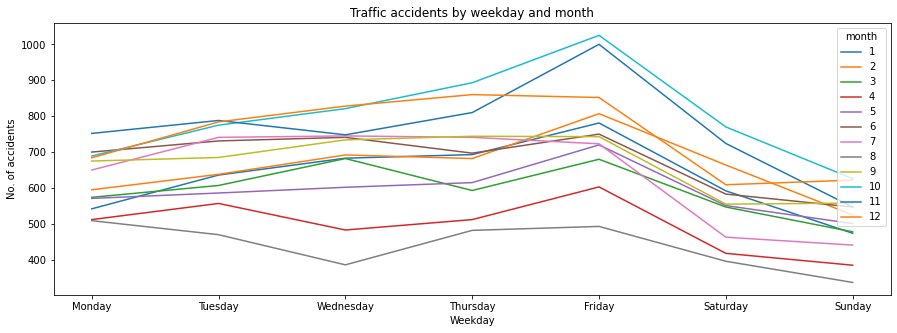

In [92]:
acc_year_month.T.plot(kind='line',
                      #color=['lightcoral', 'khaki',  'paleturquoise'],
                       stacked=False,
                       figsize=(15, 5))

plt.title('Traffic accidents by weekday and month')
plt.ylabel('No. of accidents')
plt.xlabel('Weekday')
plt.show()

### Per hour
The distribution of the accident along the year registers the peaks in the hours with more traffic, from  8 to 24, with the higher increases in 8-9, 14 and 18-20.
This distribution is the same for the three years.

In [107]:
acc_hour = accidents.groupby('hour')['num_expediente'].count().reset_index()
acc_hour.set_index('hour',inplace = True)
acc_hour;

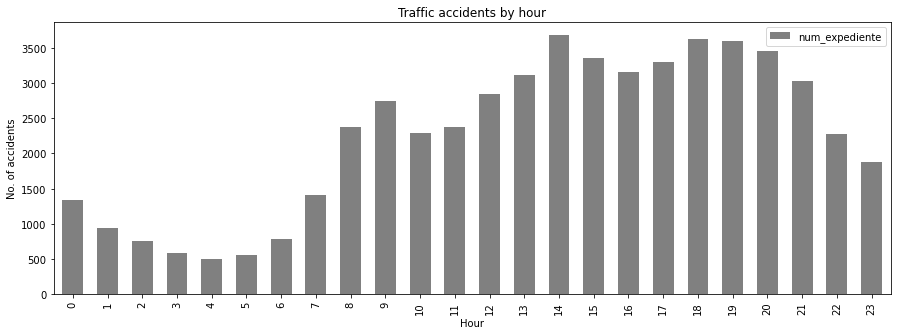

In [21]:
acc_hour.plot(kind='bar',
                    color=['grey'],
                    width = 0.6,
                    stacked=False,
                    figsize=(15, 5))

plt.title('Traffic accidents by hour')
plt.ylabel('No. of accidents')
plt.xlabel('Hour')
plt.show()

Vamos a ver si esta distribucion es uniforme para los tres años de muestra

In [82]:
acc_hour_2019 = accidents[accidents['year_date']==2019]
acc_hour_2019 = acc_hour_2019.groupby('hour')['num_expediente'].count().reset_index()
acc_hour_2019.set_index('hour',inplace = True)
acc_hour_2019 = acc_hour_2019.rename({'num_expediente': '2019'}, axis=1)

acc_hour_2020 = accidents[accidents['year_date']==2020]
acc_hour_2020 = acc_hour_2020.groupby('hour')['num_expediente'].count().reset_index()
acc_hour_2020.set_index('hour',inplace = True)
acc_hour_2020 = acc_hour_2020.rename({'num_expediente': '2020'}, axis=1)

acc_hour_2021 = accidents[accidents['year_date']==2021]
acc_hour_2021 = acc_hour_2021.groupby('hour')['num_expediente'].count().reset_index()
acc_hour_2021.set_index('hour',inplace = True)
acc_hour_2021 = acc_hour_2021.rename({'num_expediente': '2021'}, axis=1)

acc_hour_year = pd.concat([acc_hour_2019, acc_hour_2020,acc_hour_2021],axis=1) 

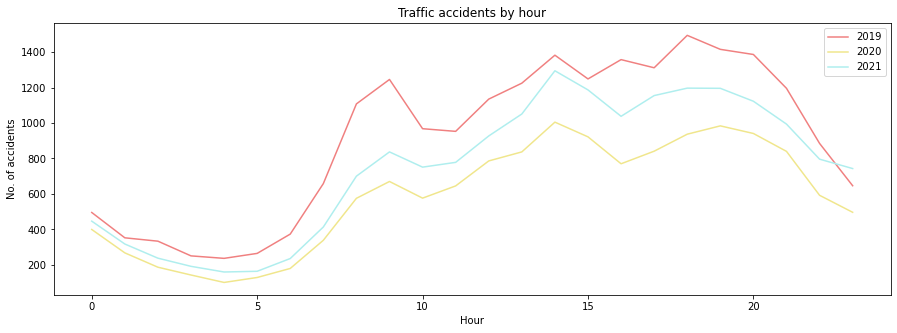

In [83]:
acc_hour_year.plot(kind='line',
                    color=['lightcoral', 'khaki',  'paleturquoise'],
                    stacked=False,
                    figsize=(15, 5))

plt.title('Traffic accidents by hour')
plt.ylabel('No. of accidents')
plt.xlabel('Hour')
plt.show()

Taking into account if we are in the weekend, we see the distribution of accidents changes, increasing the accidents registered durin the night (21h - 6h) and drecreasing almost in all others.
But the proportion during the year it is constant for all months.

In [131]:
y_values = accidents['is_weekend_bank'].value_counts().tolist()

acc_week = accidents[accidents['is_weekend_bank']==False]
acc_week_hour = acc_week.groupby('hour')['num_expediente'].count().reset_index()
acc_week_hour.set_index('hour',inplace = True)
acc_week_hour = acc_week_hour.rename({'num_expediente': 'Workingday'}, axis=1)
acc_week_hour = acc_week_hour['Workingday']/y_values[0]

acc_weekend = accidents[accidents['is_weekend_bank']==True]
acc_weekend_hour = acc_weekend.groupby('hour')['num_expediente'].count().reset_index()
acc_weekend_hour.set_index('hour',inplace = True)
acc_weekend_hour = acc_weekend_hour.rename({'num_expediente': 'Weekend'}, axis=1)
acc_weekend_hour = acc_weekend_hour['Weekend']/y_values[1]

acc_weektype_hour = pd.merge(acc_week_hour, acc_weekend_hour, left_index=True, right_index=True)


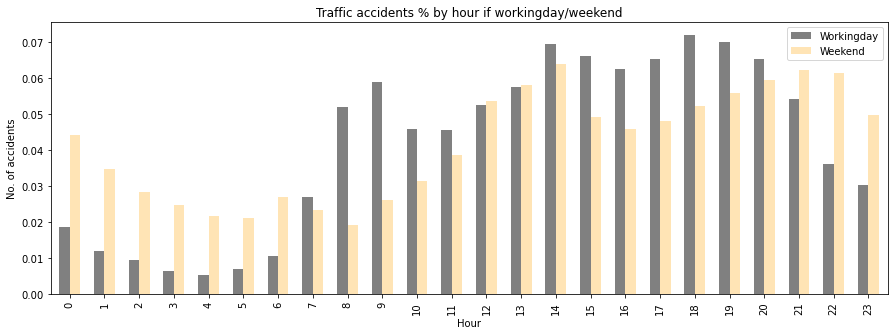

In [132]:
acc_weektype_hour.plot(kind='bar',
                        color=['grey', 'moccasin'],
                        width = 0.6,
                        stacked=False,
                        figsize=(15, 5))

plt.title('Traffic accidents % by hour if workingday/weekend')
plt.ylabel('No. of accidents')
plt.xlabel('Hour')
plt.show()

In [208]:
acc_week = accidents[accidents['is_weekend_bank']==False]
acc_week_month = acc_week.groupby('month')['num_expediente'].count().reset_index()
acc_week_month['month']=months
acc_week_month.set_index('month',inplace = True)
acc_week_month = acc_week_month.rename({'num_expediente': 'Workingday'}, axis=1)

acc_weekend = accidents[accidents['is_weekend_bank']==True]
acc_weekend_month = acc_weekend.groupby('month')['num_expediente'].count().reset_index()
acc_weekend_month['month']=months
acc_weekend_month.set_index('month',inplace = True)
acc_weekend_month = acc_weekend_month.rename({'num_expediente': 'Weekend'}, axis=1)

acc_weektype_month = pd.merge(acc_week_month, acc_weekend_month, left_index=True, right_index=True)
acc_weektype_month['total']=acc_weektype_month['Workingday']+acc_weektype_month['Weekend']
acc_weektype_month['Workingday'] = acc_weektype_month['Workingday']/acc_weektype_month['total']
acc_weektype_month['Weekend'] = acc_weektype_month['Weekend']/acc_weektype_month['total']
acc_weektype_month=acc_weektype_month.drop(labels='total', axis=1)

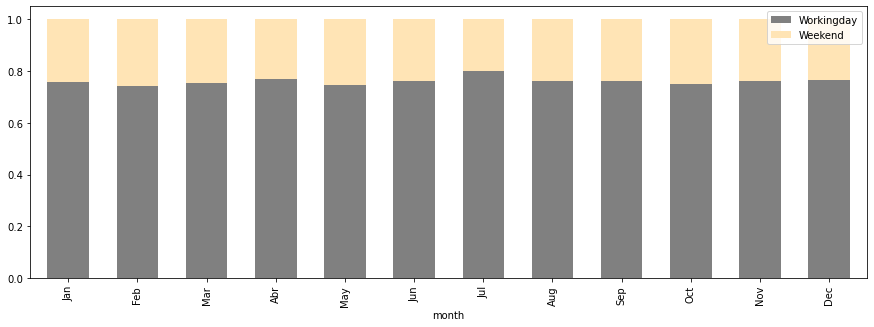

In [209]:
acc_weektype_month.plot(kind = 'bar', 
             stacked = 'True',
             color = ['grey', 'moccasin'],
             width = 0.6,               
             figsize=(15,5)); 

## 2. Where?

Refering to the place we have the following features:
- 'cod_distrito',
- 'coordenada_x_utm' and 'coordenada_y_utm'

In [265]:
utm_x_dist_mean = accidents.groupby('cod_distrito')['coordenada_x_utm'].mean()
utm_y_dist_mean= accidents.groupby('cod_distrito')['coordenada_y_utm'].mean()

acc_dist = accidents.groupby('cod_distrito')['num_expediente'].count().reset_index()
acc_dist.set_index('cod_distrito',inplace = True)

utm_mean = pd.merge(utm_x_dist_mean, utm_y_dist_mean, left_index=True, right_index=True)
utm_mean = pd.merge(utm_mean, acc_dist, left_index=True, right_index=True)
utm_mean;

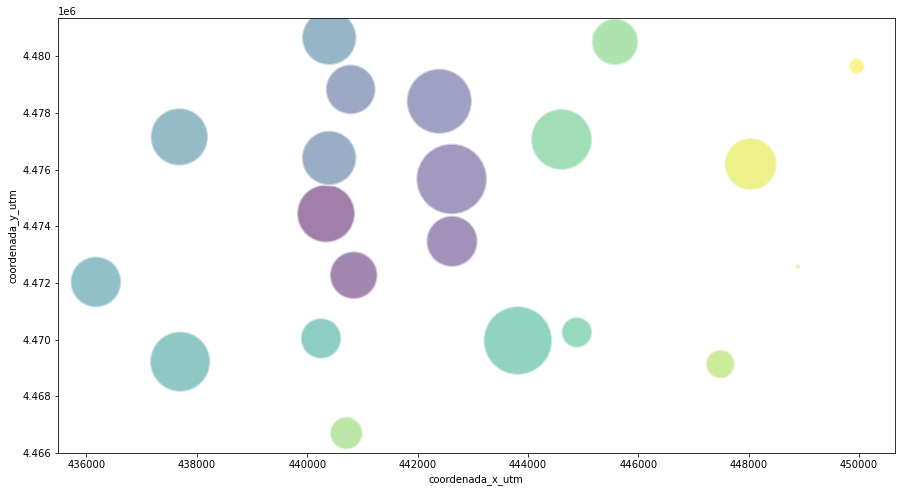

In [264]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data=utm_mean, x="coordenada_x_utm", y="coordenada_y_utm", 
                size="num_expediente", 
                palette="viridis",
                alpha=0.5,
                legend=False, 
                hue="cod_distrito",
                sizes=(20, 5000))
plt.show()

,num_expediente
cod_distrito,
1.0,3099
2.0,2394
3.0,2613
4.0,4173
5.0,3693
6.0,2529
7.0,2854
8.0,2852
9.0,3070


<AxesSubplot:xlabel='cod_distrito'>

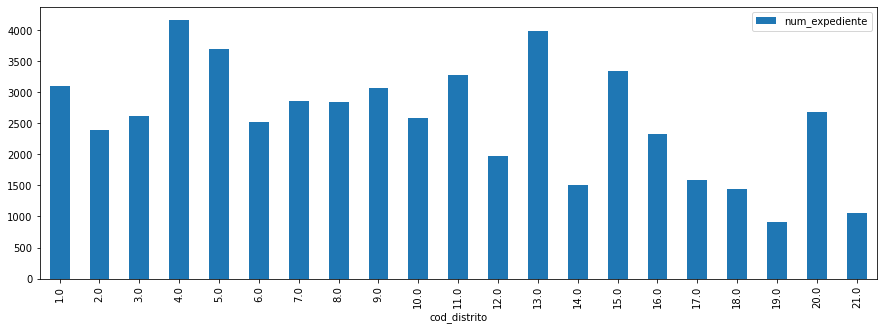

In [216]:
acc_dist.plot(kind='bar',
                        #color=['grey', 'moccasin'],
                        #width = 0.6,
                        stacked=False,
                        figsize=(15, 5))

Let's plot the UTMs coordinates:

(4460000.0, 4495000.0)

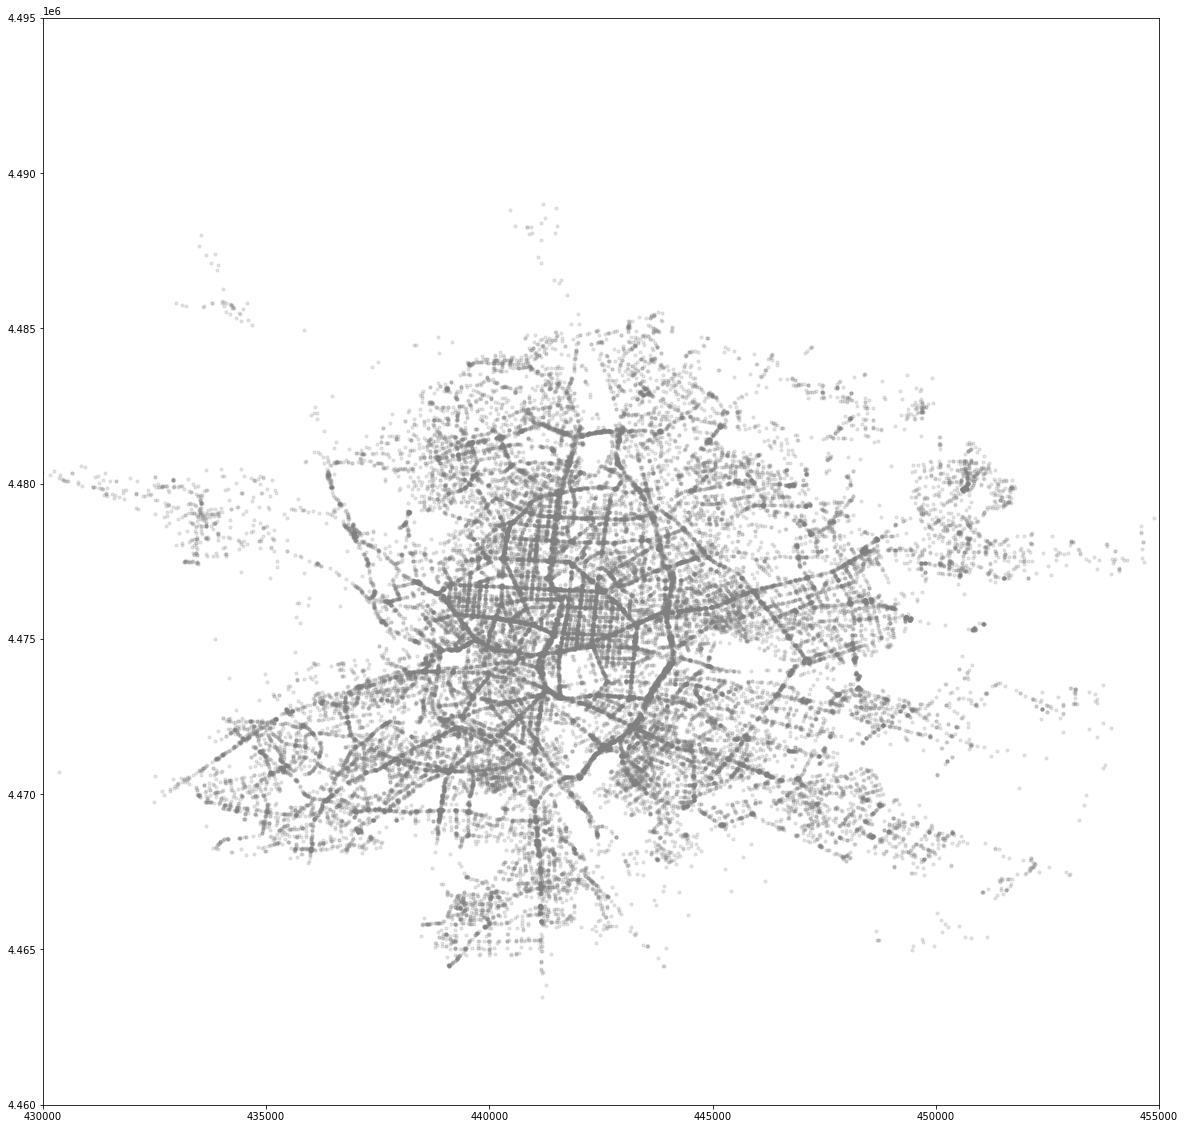

In [271]:
fig,axis = plt.subplots(1,1,figsize=(20,20))
axis.scatter(x=accidents["coordenada_x_utm"], y=accidents["coordenada_y_utm"], 
             marker="o", color="grey", s = 10, alpha= 0.2)
axis.set_xlim([430000, 455000])
axis.set_ylim([4460000, 4495000])

Let's zoom:

In [282]:
accidents

,Unnamed: 0,num_expediente,fecha,hora,cod_distrito,tipo_accidente,estado_meteorologico,coordenada_x_utm,coordenada_y_utm,year_date,weak_day,month,hour,is_weekend_bank
0,0,2019S000001,01/01/2019,3:45:00,11.0,Alcance,Se desconoce,439139.603,4470836.854,2019,Tuesday,1,3,False
1,1,2019S000002,01/01/2019,3:50:00,10.0,Choque contra obstáculo fijo,Despejado,436473.789,4472030.489,2019,Tuesday,1,3,False
2,2,2019S000003,01/01/2019,4:00:00,12.0,Colisión fronto-lateral,Despejado,440462.407,4470926.552,2019,Tuesday,1,4,False
3,3,2019S000004,01/01/2019,4:00:00,9.0,Choque contra obstáculo fijo,Despejado,438274.088,4479629.873,2019,Tuesday,1,4,False
4,4,2019S000006,01/01/2019,8:10:00,11.0,Choque contra obstáculo fijo,Despejado,438116.128,4471171.190,2019,Tuesday,1,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54003,54003,2021S025094,29/12/2021,21:20:00,8.0,Colisión lateral,Se desconoce,440451.148,4482181.906,2021,Wednesday,12,21,False
54004,54004,2021S025095,30/10/2021,1:30:00,12.0,Choque contra obstáculo fijo,Se desconoce,439950.353,4471313.995,2021,Saturday,10,1,True
54005,54005,2021S025096,11/12/2021,14:00:00,13.0,Choque contra obstáculo fijo,Se desconoce,445394.234,4471410.963,2021,Saturday,12,14,True
54006,54006,2021S025097,31/12/2021,19:10:00,8.0,Alcance,Despejado,439535.639,4481279.053,2021,Friday,12,19,False


(4470000.0, 4486000.0)

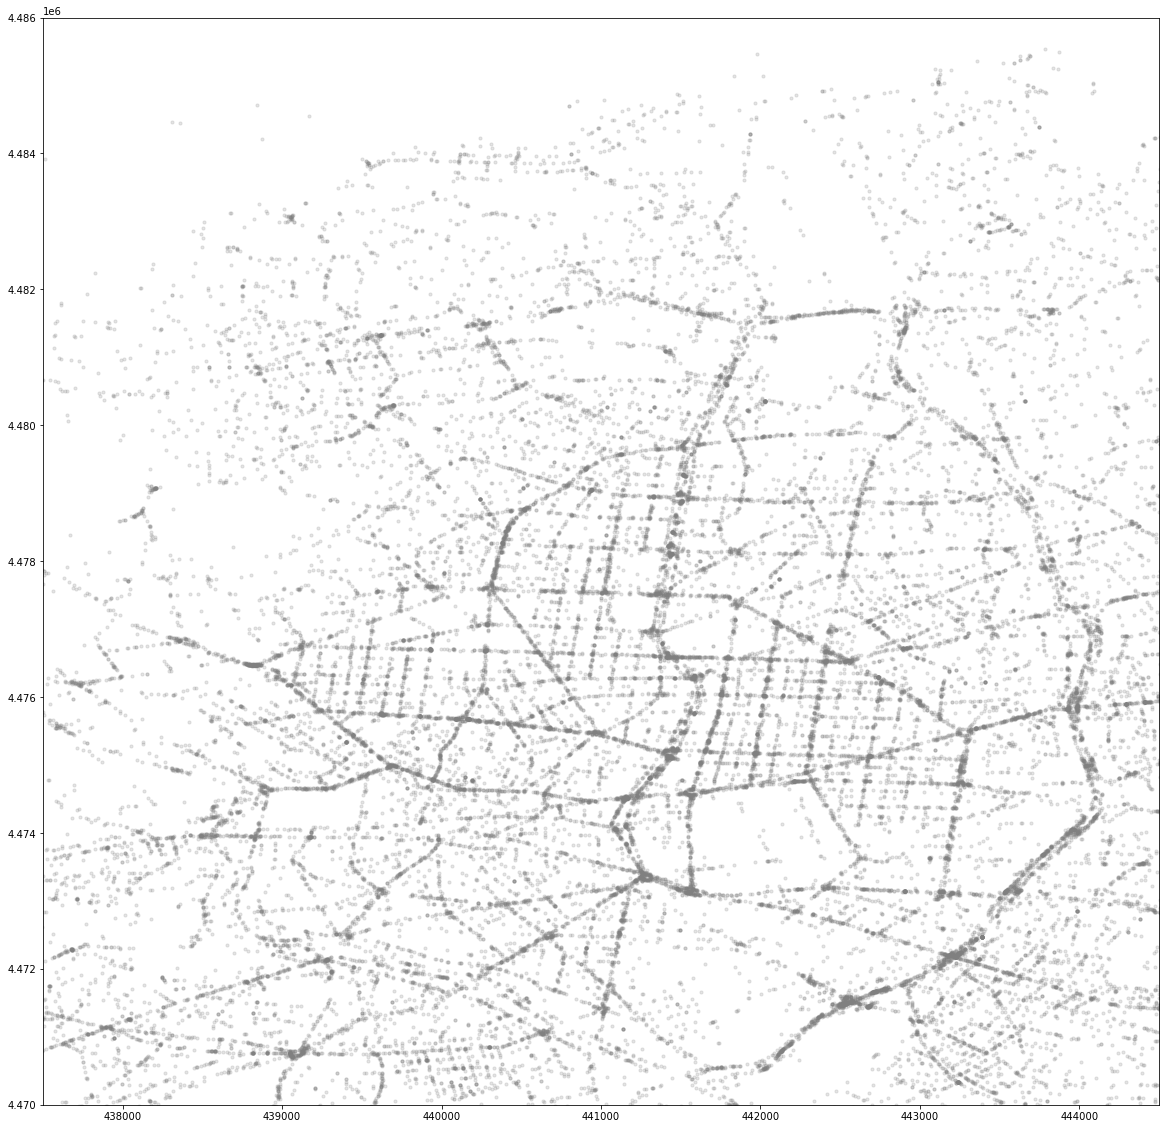

In [281]:
fig,axis = plt.subplots(1,1,figsize=(20,20))
axis.scatter(x=accidents["coordenada_x_utm"], y=accidents["coordenada_y_utm"], 
             marker="o", color="grey", s = 10, alpha= 0.2)
axis.set_xlim([437500, 444500])
axis.set_ylim([4470000, 4486000])